<a href="https://colab.research.google.com/github/Naufall1/PCVK_Ganjil_2024/blob/main/PCVK_Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama  : Muhammad Naufal Kurniawan ✅ <br>
Kelas : TI-3C [18] <br>
NIM   : 2241720214 <br>

### Buatlah fungsi konvolusi menggunakan algoritma yang telah dijelaskan pada Bagian C, tanpa menggunakan library atau metode konvolusi dari OpenCV.

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from PIL import Image as im

(256, 256)
(258, 258)
(258, 258)


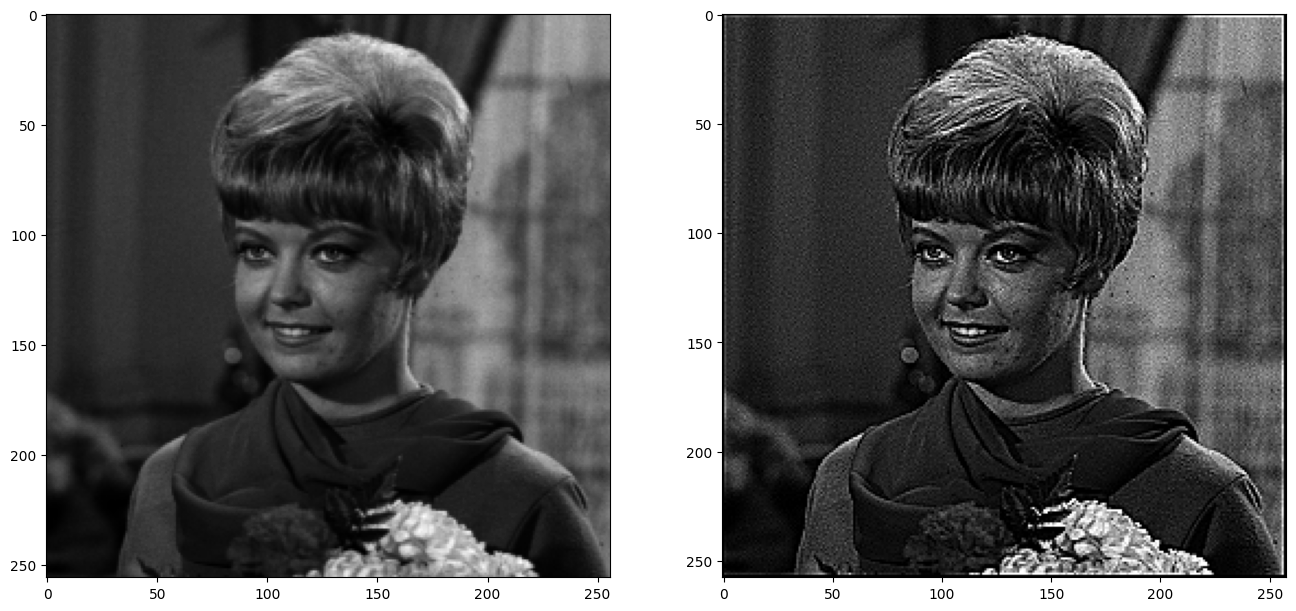

In [ ]:
def generateGaussKernel():
  kernel_size = 21
  sigma=math.sqrt(kernel_size)
  gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
  gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()
  return gauss_kernel

def convolution2d(image, kernel, stride=1, padding=0):
    if padding > 0:
        image = np.pad(image, padding, mode='constant', constant_values=0)

    kernel = np.array(kernel)
    image_h, image_w = image.shape
    kernel_h, kernel_w = kernel.shape

    output_h = (image_h - kernel_h) // stride + 1
    output_w = (image_w - kernel_w) // stride + 1
    output = np.zeros((output_h, output_w))

    for y in range(0, output_h):
        for x in range(0, output_w):
            region = image[
                y * stride : y * stride + kernel_h,
                x * stride : x * stride + kernel_w
                ]
            # print(f'[{y * stride} : {y * stride + kernel_h}, {x * stride} : {x * stride + kernel_w}] {y , x}')

            p = np.sum(region * kernel)

            output[y, x] = np.clip(p, 0, 255)
    # return 0

    return output

img_fig, img_axs = plt.subplots(1, 2, figsize=(16, 8))

filters = {
    'sharpen': np.array([
        [ 0, -1,  0],
        [-1,  5, -1],
        [ 0, -1,  0],
    ]),
    'emboss': np.array([
        [-2, -1,  0],
        [-1,  1,  1],
        [ 0,  1,  2],
    ]),
    'left_sobel_edge_detection': np.array([
        [ 1,  0, -1],
        [ 2,  0, -2],
        [ 1,  0, -1],
    ]),
    'canny_edge_detection': np.array([
        [-1, -1, -1],
        [-1,  8, -1],
        [-1, -1, -1],
    ]),
    'prewitt_edge_detection': np.array([
        [-1, -1, -1],
        [ 0,  0,  0],
        [ 1,  1,  1],
    ]),
    'gaussian_blurr': 1/256 * np.array([
        [ 1,  4,  6,  4,  1],
        [ 4, 16, 24, 16,  4],
        [ 6, 24, 36, 24,  6],
        [ 4, 16, 24, 16,  4],
        [ 1,  4,  6,  4,  1],
    ]),
    'gaussian_blurr_21.21': generateGaussKernel(),
}

image = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/images/female/female.tiff')
image_ori = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

img_axs[0].imshow(image_ori, cmap='gray')
print(image_ori.shape)

image = convolution2d(image_ori, filters['sharpen'],1,2)
img_axs[1].imshow(image, cmap='gray')
print(image.shape)
image = convolution2d(image_ori, filters['sharpen'],1,2)
img_axs[1].imshow(image, cmap='gray')
print(image.shape)